In [1]:
import os
import pandas as pd
import torch
import RNNutils as utils

In [2]:
drama=pd.read_csv('1.csv').text
pop=pd.read_csv('2.csv').text
outsea=pd.read_csv('3.csv').text
from konlpy.tag import Okt

tokenizer=Okt()

dramatokens=utils.getToken(drama,tokenizer)
poptokens=utils.getToken(pop,tokenizer)
outseatokens=utils.getToken(outsea,tokenizer)

In [3]:
print(len(dramatokens),len(poptokens),len(outseatokens))

4613 3596 2638


In [4]:
dramatokens[0]

['선희',
 '박주현',
 '가다',
 '교통사고',
 '당하다',
 '날',
 '지현우',
 '이시우',
 '늘다',
 '다급하다',
 '도망치다',
 '행인',
 '목격',
 '선희',
 '차로',
 '밀치다',
 '범인',
 '이자',
 '실종',
 '이수연',
 '빈',
 '이르다',
 '확신']

In [5]:
def getname(num):
    name={0:'드라마',1:'뮤직',2:'해외연예'}
    return name[num]

In [6]:
dramaDF=pd.DataFrame(pd.Series(dramatokens),columns=['tokens']).sample(frac=0.8)
dramaDF['label']=0

popDF=pd.DataFrame(pd.Series(poptokens),columns=['tokens'])
popDF['label']=1

overseaDF=pd.DataFrame(pd.Series(outseatokens),columns=['tokens'])
overseaDF['label']=2
print(dramaDF.shape,popDF.shape,overseaDF.shape)


(3690, 2) (3596, 2) (2638, 2)


In [7]:
dataDF=pd.concat([dramaDF,popDF,overseaDF],axis=0,ignore_index=True)
print(dataDF.shape)
trainDF=dataDF.sample(frac=0.9,random_state=10)
testDF=dataDF.drop(trainDF.index)
print(trainDF.shape,testDF.shape)

(9924, 2)
(8932, 2) (992, 2)


In [8]:
trainDF

,tokens,label
2416,"[한유리, 신입, 변호사, 오리엔테이션, 참가, 선배, 변호사, 성장하다, 스타, ...",0
4509,"[이번, 신곡, 지난, 발매, 데뷔, 곡, 엠, 아이, 오다, 발표, 번째, 디지털...",1
9367,"[놓다, 특정하다, 시기, 린킨, 파크, 아니다, 린킨, 파크, 라는, 밴드, 자체...",2
4147,"[한편, 늘다, 날, 곡, 무대, 연달, 몰아치다, 시상식, 현장, 뜨겁다, 달구다...",1
2257,"[앞서, 하석주, 위원장, 슈퍼리그, 개최, 국가, 항전, 예고, 첫, 번째, 대결...",0
...,...,...
4319,"[세라핌, 비롯, 많다, 가수, 이미, 나오다, 노래, 다시, 부르다, 리믹스, 버...",1
6167,"[그룹, 원, 하모니, 기호, 오후, 경기도, 고양시, 드림, 센터, 열리다, 챔피...",1
7741,"[그렇다, 채플, 론, 이라는, 아티스트, 남다르다, 캐릭터, 보컬, 찰리, 음악,...",2
2388,"[회사, 에서도, 해영, 지욱, 연기, 계속, 사람, 동료, 앞, 달달, 볶다, 신...",0


In [9]:
# 단어사전 생성 및 넘버링
vocab=utils.get_vocab(trainDF.tokens,n_vocab=10000)

token_to_idx={token:idx for idx,token in enumerate(vocab)}
idx_to_token={idx:token for idx,token in enumerate(vocab)}

print(token_to_idx)

{'<pad>': 0, '<oov>': 1, '말': 2, '않다': 3, '받다': 4, '오다': 5, '보다': 6, '늘다': 7, '가다': 8, '없다': 9, '사람': 10, '지난': 11, '같다': 12, '모습': 13, '함께': 14, '무대': 15, '팬': 16, '곡': 17, '공연': 18, '공개': 19, '아니다': 20, '날': 21, '방송': 22, '자신': 23, '드라마': 24, '사랑': 25, '통해': 26, '배우': 27, '위': 28, '시간': 29, '그렇다': 30, '에는': 31, '싶다': 32, '석류': 33, '밝히다': 34, '첫': 35, '라는': 36, '음악': 37, '생각': 38, '좋다': 39, '이번': 40, '마음': 41, '시작': 42, '많다': 43, '멤버': 44, '사진': 45, '어떻다': 46, '미국': 47, '이후': 48, '작품': 49, '가족': 50, '내다': 51, '최승': 52, '집': 53, '들다': 54, '속': 55, '크다': 56, '앨범': 57, '중': 58, '그룹': 59, '활동': 60, '손해': 61, '한편': 62, '이야기': 63, '만들다': 64, '출연': 65, '대표': 66, '대한': 67, '현지': 68, '영상': 69, '따르다': 70, '현': 71, '서울': 72, '사실': 73, '보이다': 74, '선보이다': 75, '이라고': 76, '콘서트': 77, '앞': 78, '데뷔': 79, '만나다': 80, '예정': 81, '온': 82, '한국': 83, '민': 84, '특히': 85, '일본': 86, '시키다': 87, '원': 88, '역': 89, '주다': 90, '자다': 91, '발매': 92, '연기': 93, '스타': 94, '영화': 95, '오후': 96, '투어': 97, '진행': 98, '다시': 99, '엄마

In [20]:
import json

with open("token_to_idx.json", "w", encoding="utf-8") as f:
    json.dump(token_to_idx, f, ensure_ascii=False, indent=4)

In [10]:
token_to_idx

{'<pad>': 0,
 '<oov>': 1,
 '말': 2,
 '않다': 3,
 '받다': 4,
 '오다': 5,
 '보다': 6,
 '늘다': 7,
 '가다': 8,
 '없다': 9,
 '사람': 10,
 '지난': 11,
 '같다': 12,
 '모습': 13,
 '함께': 14,
 '무대': 15,
 '팬': 16,
 '곡': 17,
 '공연': 18,
 '공개': 19,
 '아니다': 20,
 '날': 21,
 '방송': 22,
 '자신': 23,
 '드라마': 24,
 '사랑': 25,
 '통해': 26,
 '배우': 27,
 '위': 28,
 '시간': 29,
 '그렇다': 30,
 '에는': 31,
 '싶다': 32,
 '석류': 33,
 '밝히다': 34,
 '첫': 35,
 '라는': 36,
 '음악': 37,
 '생각': 38,
 '좋다': 39,
 '이번': 40,
 '마음': 41,
 '시작': 42,
 '많다': 43,
 '멤버': 44,
 '사진': 45,
 '어떻다': 46,
 '미국': 47,
 '이후': 48,
 '작품': 49,
 '가족': 50,
 '내다': 51,
 '최승': 52,
 '집': 53,
 '들다': 54,
 '속': 55,
 '크다': 56,
 '앨범': 57,
 '중': 58,
 '그룹': 59,
 '활동': 60,
 '손해': 61,
 '한편': 62,
 '이야기': 63,
 '만들다': 64,
 '출연': 65,
 '대표': 66,
 '대한': 67,
 '현지': 68,
 '영상': 69,
 '따르다': 70,
 '현': 71,
 '서울': 72,
 '사실': 73,
 '보이다': 74,
 '선보이다': 75,
 '이라고': 76,
 '콘서트': 77,
 '앞': 78,
 '데뷔': 79,
 '만나다': 80,
 '예정': 81,
 '온': 82,
 '한국': 83,
 '민': 84,
 '특히': 85,
 '일본': 86,
 '시키다': 87,
 '원': 88,
 '역': 89,
 '주다': 90,
 '자

(array([4.819e+03, 2.619e+03, 1.028e+03, 3.120e+02, 1.170e+02, 1.600e+01,
        1.300e+01, 3.000e+00, 1.000e+00, 4.000e+00]),
 array([ 16. ,  28.5,  41. ,  53.5,  66. ,  78.5,  91. , 103.5, 116. ,
        128.5, 141. ]),
 <BarContainer object of 10 artists>)

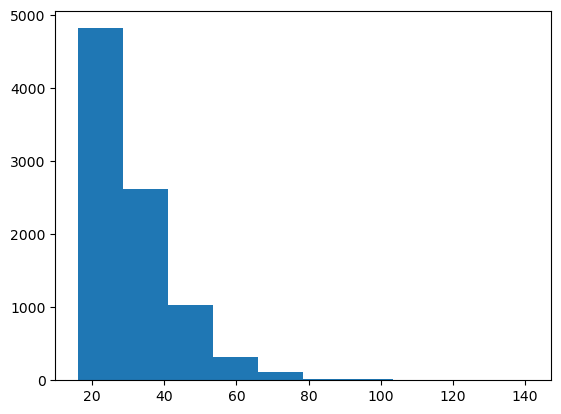

In [11]:
import matplotlib.pyplot as plt
plt.hist([len(token) for token in trainDF.tokens])

In [12]:
trainnum=utils.padding_vectorize(trainDF.tokens,token_to_idx,pad_length=30)
testnum=utils.padding_vectorize(testDF.tokens,token_to_idx,pad_length=30)

In [13]:
trainnum

array([[ 173, 2539,  293, ...,    0,    0,    0],
       [  40,  419,   11, ...,    0,    0,    0],
       [ 749, 8080, 1621, ...,    0,    0,    0],
       ...,
       [  30, 5953, 2456, ...,    0,    0,    0],
       [ 269,  227,  366, ..., 5243, 1465,  930],
       [1167,  243,  410, ...,    0,    0,    0]])

In [58]:

train_text=torch.tensor(trainnum)
train_label=torch.FloatTensor(trainDF.label.values)

test_text=torch.tensor(testnum)
test_label=torch.FloatTensor(testDF.label.values)


In [59]:
from torch.utils.data import TensorDataset,DataLoader

trainDS=TensorDataset(train_text,train_label)
testDS=TensorDataset(test_text,test_label)

trainDL=DataLoader(trainDS,batch_size=16)
testDL=DataLoader(testDS,batch_size=len(testDS))

In [72]:
model=utils.SentenceClassifier(n_vocab=len(token_to_idx),hidden_dim=128,embedding_dim=16,n_layers=4,feature_n=3,dropout=0.8)

import torch.optim as optim
import torch.nn as nn
from torchmetrics.classification import MulticlassF1Score
import torch.optim.lr_scheduler as lr_scheduler

optimizer=optim.Adam(model.parameters(),lr=0.0005)
lossfun=nn.CrossEntropyLoss()
scorefun=MulticlassF1Score(num_classes=3)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=10,factor=0.3,mode='max')


In [73]:
EPOCH=100
TV=utils.Train_val(trainDL,testDL,model,optimizer,lossfun,scorefun)
train=TV.train(EPOCH,scheduler,1)

[1/100]
train loss 1.0892216795672245, train score 0.2509313489182157
test loss 1.0946813821792603, test score 0.22395138442516327
scheduler.num_bad_epochs 0/10
[2/100]
train loss 0.9100243096807988, train score 0.422426923296426
test loss 0.8018543720245361, test score 0.4757588505744934
scheduler.num_bad_epochs 0/10
[3/100]
train loss 0.7216301729939278, train score 0.5308814305205678
test loss 0.6951035261154175, test score 0.6339889764785767
scheduler.num_bad_epochs 0/10
[4/100]
train loss 0.6144279197045004, train score 0.6818985916101016
test loss 0.6351041197776794, test score 0.7240278720855713
scheduler.num_bad_epochs 0/10
[5/100]
train loss 0.5424539943447266, train score 0.741379865913357
test loss 0.6112475395202637, test score 0.7233281135559082
scheduler.num_bad_epochs 1/10
[6/100]
train loss 0.47957296537531935, train score 0.7762599481346355
test loss 0.5653488039970398, test score 0.7444320917129517
scheduler.num_bad_epochs 0/10
[7/100]
train loss 0.4187073301330662, t

model 1  0.913  
model 2 0.9156588315963745  
model 3 
[30/100]
train loss 0.0012453502659549745, train score 0.999683449949537  
test loss 0.45891261100769043, test score 0.9229554533958435  
scheduler.num_bad_epochs 0/10  


In [74]:
from sklearn.metrics import classification_report

model=torch.load('model/best_model3.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

         0.0       0.44      0.48      0.46       364
         1.0       0.46      0.51      0.49       367
         2.0       0.35      0.25      0.29       261

    accuracy                           0.43       992
   macro avg       0.42      0.42      0.41       992
weighted avg       0.43      0.43      0.43       992



In [75]:
news="10일(한국시간) 미국 연예매체 백그리드는 할리우드 배우 마고 로비의 근황이 담긴 사진을 공개했다.보도에 따르면 만삭의 '바비' 인형 스타는 제작진과 함께 미국 캘리포니아 산타모니카에 있는 '시그니처 포스트' 편집실을 떠나면서 미소를 지어 보였다. 아름다운 D라인 역시 시선을 사로잡는다."

news=[news]
newtokens=utils.getToken(news,tokenizer)
newvector=utils.padding_vectorize(newtokens,token_to_idx,pad_length=30)
newTS=torch.tensor(newvector)
pre_y=model(newTS)
print(getname(torch.argmax(pre_y).item()))

가요


In [76]:
news=["""극 중 시골마을 금제의 ‘잇걸’ 이주리 역으로 새로운 변신을 앞둔 이세희가 화려한 미모로 캐릭터에 대한 관심을 고조시킨다. 작품의 포스터 촬영 현장 비하인드 컷이 공개된 가운데, 이세희는 핑크 빛 스타일링으로 ‘핫’한 매력을 가감 없이 발휘, 눈을 뗄 수 없는 다채로운 면모로 시선을 강탈하고 있는 것. 90년대 미스코리아를 연상케 하는 사자머리와 색조 메이크업도 완벽하게 소화한 그녀는 핑크 색상의 의상부터 리본, 귀걸이, 선글라스, 장갑 등의 다양한 소품들까지 더해 사랑스러운 분위기를 극대화하고 있다."""]
newtokens=utils.getToken(news,tokenizer)
newvector=utils.padding_vectorize(newtokens,token_to_idx,pad_length=30)
newTS=torch.tensor(newvector)
pre_y=model(newTS)
print(getname(torch.argmax(pre_y).item()))

가요
